In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

 # EDA 

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df.rename(columns = {'Life expectancy at birth (years)':'Life_exp'}, inplace = True)
df.head()

,Country,Year,Life_exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.isna().any()

Country     False
Year        False
Life_exp    False
GDP         False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   96 non-null     object 
 1   Year      96 non-null     int64  
 2   Life_exp  96 non-null     float64
 3   GDP       96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
df.describe()

,Year,Life_exp,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [7]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]




# __Analysis Objectives__

 1. Which countries have the highest and lowest life expectancy/GDP?
 2. Did all countries have a steady growth in life expectancy and GDP over the years?
 3. Which country had the rapid growth in life expectancy over the years?
 4. Did GDP has a positive relationship with life expectancy? If yes, it is positive or negative?


## Objective 1---

In [8]:
scaler = StandardScaler()
scaled_gdp = scaler.fit_transform(np.array(df['GDP']).reshape(-1,1))
df['Scaled_gdp'] = scaled_gdp


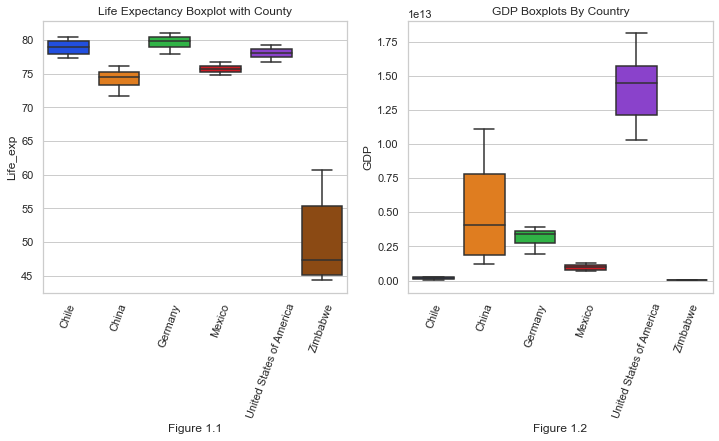

In [37]:
# plt.figure(figsize = (10,9))
sns.set_style('whitegrid')
palette1 = sns.color_palette('bright',6)
#sns.palplot(palette1)
sns.set_palette(palette1)

fig, ax = plt.subplots(1,2,figsize = (12,5))
sns.boxplot(data = df, x = 'Country', y ='Life_exp',ax = ax[0])
ax[0].set_xticklabels(df['Country'].unique(),rotation = 70)
ax[0].set_title('Life Expectancy Boxplot with County')
ax[0].set_xlabel('Figure 1.1')

sns.boxplot(data = df, x = 'Country', y = 'GDP', ax = ax[1])
ax[1].set_xticklabels(df['Country'].unique(),rotation = 70)
ax[1].set_title('GDP Boxplots By Country')
ax[1].set_xlabel('Figure 1.2');

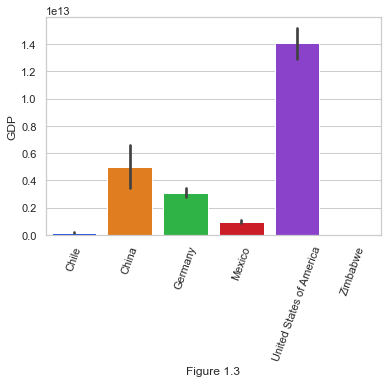

In [38]:
sns.barplot(x = df['Country'], y = df['GDP'])
plt.xticks(rotation = 70)
plt.xlabel('Figure 1.3')
plt.show();

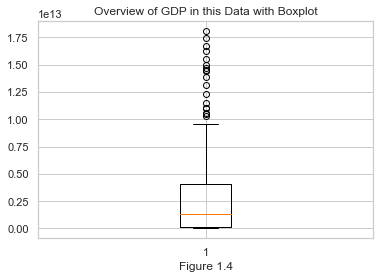

In [39]:
plt.boxplot(x=df['GDP'])
plt.title('Overview of GDP in this Data with Boxplot')
plt.xlabel('Figure 1.4')
plt.show();

## Objective 1's analysis result:
<br>
<span style = 'Color:red'> For Life Expectancy, Germany is the highest and Zimbabwe is the lowest.
    <br>
    For GDP, USA is the higest and Zimbab is the lowest.
    

## Objective 2---

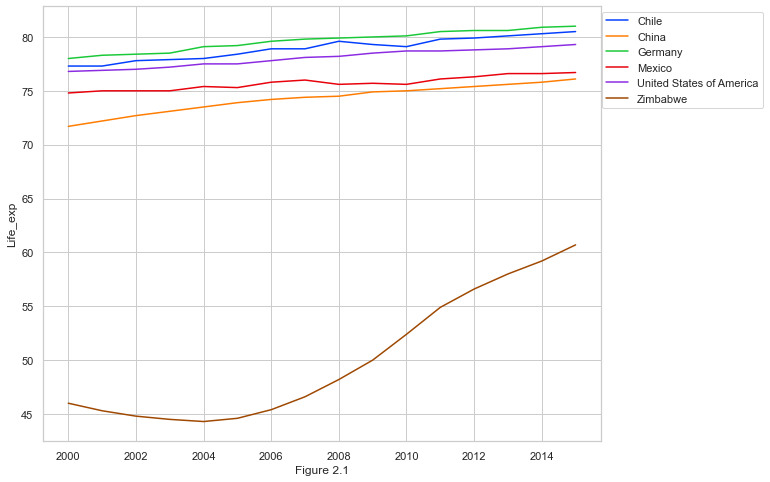

<Figure size 432x288 with 0 Axes>

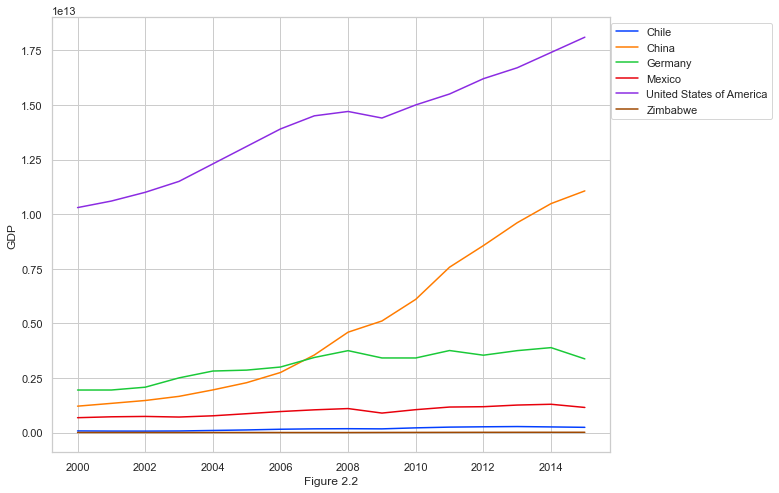

In [41]:
plt.figure(figsize = (10,8))
sns.lineplot(data = df,x = 'Year', y = 'Life_exp', hue = 'Country')
plt.legend( loc = 'upper right', bbox_to_anchor = (1.3,1))
plt.xlabel('Figure 2.1')
plt.show()

plt.clf()
plt.figure(figsize = (10,8))
sns.lineplot(data = df,x = 'Year', y = 'GDP', hue = 'Country')
plt.legend( loc = 'upper right', bbox_to_anchor = (1.3,1))
plt.xlabel('Figure 2.2')
plt.show();

 ### From the above GDP line chart, it is hard get useful insight due to the huge gap of GDP amount, especially USA & China. Therefore, we will subset data without USA & China to see the growth line from those countries with a small ratio of GDP.

In [13]:
df_gdp_subset = df.query('Country !=["United States of America", "China"]')

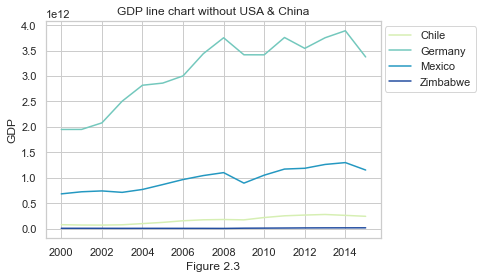

<Figure size 432x288 with 0 Axes>

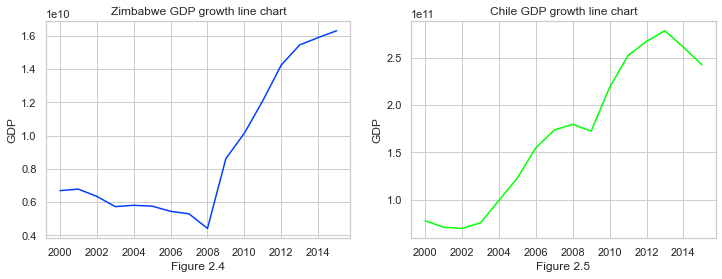

In [42]:
sns.set_context('notebook')

sns.lineplot(data = df_gdp_subset, x = 'Year', y ='GDP',hue = 'Country', palette = 'YlGnBu')
plt.legend(bbox_to_anchor = (1.3,1), loc = 'upper right')
plt.title('GDP line chart without USA & China')
plt.xlabel('Figure 2.3')
plt.show()

plt.clf()
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.lineplot(data = df.query('Country == "Zimbabwe"'), x = 'Year',y= 'GDP')
plt.title('Zimbabwe GDP growth line chart')
plt.xlabel('Figure 2.4')

plt.subplot(1,2,2)
sns.lineplot(data = df.query('Country == "Chile"'), x = 'Year',y= 'GDP', color ='lime')
plt.title('Chile GDP growth line chart')
plt.xlabel('Figure 2.5')
plt.show();

## Objective 2's analysis result:
<br>
<span style = 'Color:red'> For Life Expectancy, overall countries in the dataset showed a steady growth rate over the years, Especially Zimbabwe.
    <br>
    By overall performance, all country's GDP is growing over the years although there are some short falls, especially 2008-2009 where the financial crisis occurred.

## Objective 3---

In [15]:
def life_exp_growcheck(data):
    growth_result = {}
    for country in (data['Country']):
        result = data[data['Country']== country]['Life_exp'].max() - data[data['Country']== country]['Life_exp'].min()
        growth_result[country] = result
    
    df_growth = pd.DataFrame(list(growth_result.items()), columns = ['Country','Growth_result'])
    
    return df_growth

<function matplotlib.pyplot.show(close=None, block=None)>

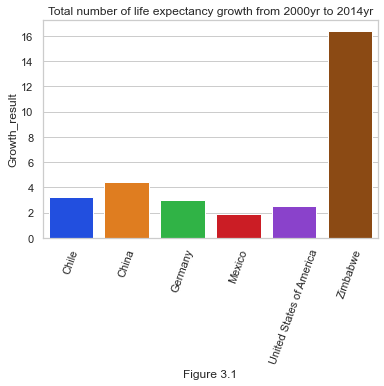

In [43]:
df_growth = life_exp_growcheck(df)
sns.barplot(data = df_growth, x = 'Country', y='Growth_result')
plt.xticks(rotation = 70)
plt.title('Total number of life expectancy growth from 2000yr to 2014yr')
plt.xlabel('Figure 3.1')
plt.show

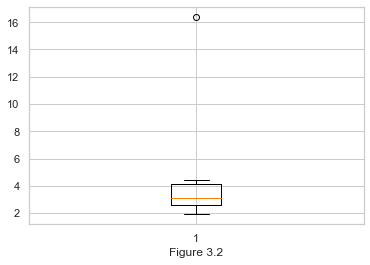

In [45]:
plt.boxplot(data = df_growth, x = 'Growth_result')
plt.xlabel('Figure 3.2')
plt.show()

In [60]:
df.query('Country !="Zimbabwe"')['Life_exp'].mean()

77.32875000000003

In [28]:
Zimbabwe_growthnumber = (df.query('Country =="Zimbabwe"')['Life_exp'].max())\
                         -(df.query('Country =="Zimbabwe"')['Life_exp'].min())
Zimbabwe_growthnumber

16.400000000000006

## Objective 3's analysis result:
<br>
<span style = 'Color:red'> The above bar chart & boxplot showed an uptrend growth in life expectancy with around 1.9-4.5 years increase in the past 14 years. 
    <br>
    <br>
    Additionally, Zimbabwe had the highest increase in life expectancy by 16.4. However, Zimbabwe's life expectancy is still the lowest among other countries where the sum up average life expectancy number is 77.33.

## Objective 4---

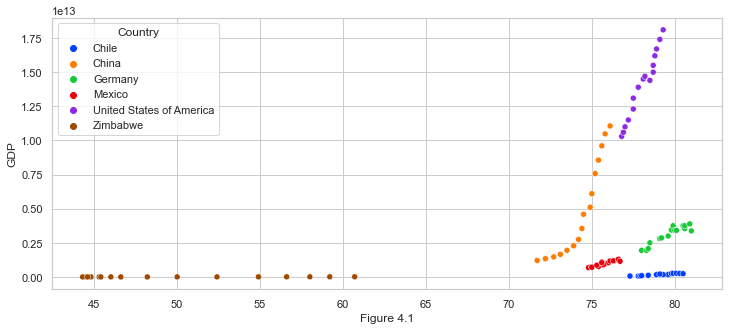

In [47]:
plt.figure(figsize = (12,5))
sns.scatterplot(data =df, x = 'Life_exp', y = 'GDP', hue = 'Country')
plt.xlabel('Figure 4.1');

 ### Based on the above scatterplot graph, we saw there is a positive relationship between Life expectancy and GDP. We have to subset the data with only Zimbabwe & Chile as we can't tell the pattern due to the gap of GDP differences among the other countries

In [21]:
df_zimbabwe = df.query('Country =="Zimbabwe"')
df_chile = df.query('Country =="Chile"')

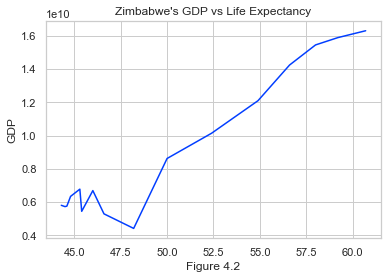

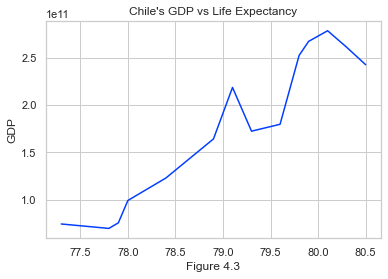

In [49]:

sns.lineplot(data =df_zimbabwe, x = 'Life_exp', y = 'GDP', ci = None)
plt.title('Zimbabwe\'s GDP vs Life Expectancy')
plt.xlabel('Figure 4.2')
plt.show()



sns.lineplot(data = df_chile, x = 'Life_exp', y = 'GDP', ci = None)
plt.title('Chile\'s GDP vs Life Expectancy')
plt.xlabel('Figure 4.3')
plt.show()

### Seaborn Heatmap also showed a positive co-relationship in life expectancy and GDP.

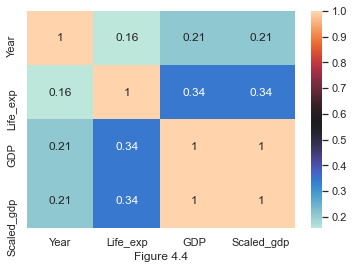

In [50]:
sns.heatmap(df.corr(), annot = True, cmap = 'icefire')
plt.xlabel('Figure 4.4')
plt.show()

### Another way of subplotting, Summarize all country in one glance for easier comparison

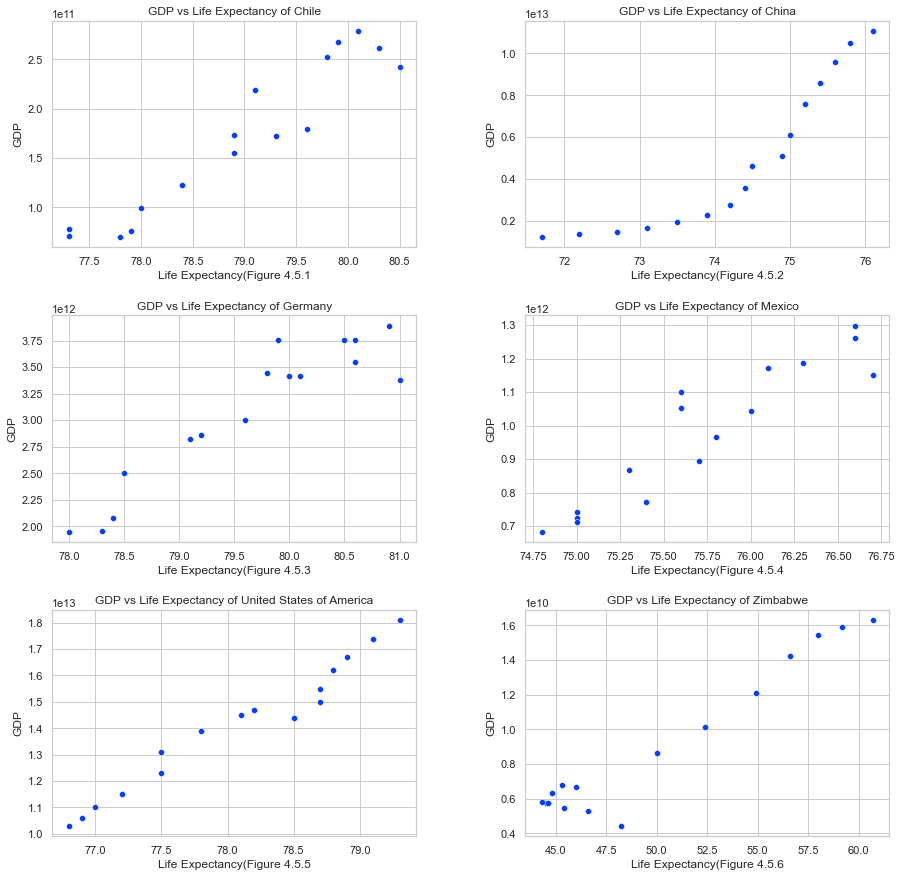

In [52]:
fig , ax = plt.subplots(3,2, figsize = (15,15))
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

ax = ax.ravel()
#print(ax)
for i in range(6):
    #print(i)

    df_country = df[df['Country']== df['Country'].unique()[i]]
    country_list = df_country['Country'].unique()
    sns.scatterplot(data=df_country, x = 'Life_exp', y='GDP', ax = ax[i])
    ax[i].set_title("GDP vs Life Expectancy of " + str(df['Country'].unique()[i]))
    ax[i].set_xlabel(f'Life Expectancy(Figure 4.5.{i+1}')
    ax[i].set_ylabel('GDP')
    #plt.tight_layout()

## Objective 4's analysis result:
<br>
<span style = 'Color:red'> We had ensured there is a positive co-relationship between GDP and life expectancy. The higher GDP is, the higher the life expectancy is.

# Summary of the findings:
__Life Expectancy__:
<br>
We found out Germany is the country with the highest life expectancy and 
Zimbabwe is the lowest(Mainly caused by the standard of living quality caused by the political instability and economic crisis). Overall, all 6 countries have a steady growth of life expectancy, especially Zimbabwe, increasing from 44.3 to 60.7 in the past 14 years. However, it's still the lowest when compared with the other 5 countries in the dataset where the average life expectancy of 77.33.
<br>
__GDP__:
<br>
United States America is the country that had the highest GDP number, followed by China. Zimbabwe had the lowest GDP. By looking at the overall performance, all countries showed uptrend directions.
<br>
__Conclusion__:
<br>
There is a positive co-relationship between GDP and life expectancy. However, higher GDP does not mean absolute high life expectancy(Figure 2.1), we have to consider other factors such as the country's infrastructure, local medical costs, and the public healthcare system.